# n-queens

- np-complete
- classical O(n!) -> quantum O(n^3) time and O(n^2) memory
- | ψ〉 = 1/√N [| R1〉 + | R2〉 + .... + | RN −1〉 + | RN 〉] 
- | Ψ〉 = | ψ1〉 ⊗ | ψ2〉 ⊗ .... ⊗ | ψN 〉-- W state

-Let Q = {Q1, Q2, ...., QN }
f : Q × Q → {0, 1} defined by,
f (Qi, Qj ) =
{
0, if j > i and Qi, Qj are along a diagonal: 
1, otherwise

-

In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [2]:
n = 25
quantum_register = QuantumRegister(n)
classical_register = ClassicalRegister(n)

qc = QuantumCircuit(quantum_register, classical_register)

In [3]:
# hadamards for preparation of W-states
wstate_prep = [0, 3, 4, 7, 8, 11, 12, 15]

for i in wstate_prep:
    qc.h(i)

In [4]:
# initialising for diagonal checks in |1>
diagonalcheck_prep = [19, 20, 21, 22, 23, 24] + wstate_prep

for i in diagonalcheck_prep:
    qc.x(i)

In [5]:
# each 4 blocks in 4qubit w-state
qc.ccx(0, 3, 1)
qc.ccx(4, 7, 5)
qc.ccx(8, 11, 9)
qc.ccx(12, 15, 13)

for i in wstate_prep:
    qc.x(i)

qc.ccx(0, 3, 2)
qc.ccx(4, 7, 6)
qc.ccx(8, 11, 10)
qc.ccx(12, 15, 14)

temp = 2
flag = 0
for idx,i in enumerate(wstate_prep, 1):
    #print(temp, i)
    if flag:
        temp+=4
        flag=0
        
    qc.cx(temp, i)
    
    if idx%2 == 1:
        flag=1


In [6]:
# column check
qc.h(16)  
qc.h(17)  
qc.h(18)  

# Controlled-U1 gates
angle = 3.14159265358979 
qc.cp(angle, 16, 0)  
qc.cp(angle, 16, 4)  
qc.cp(angle, 16, 8)  
qc.cp(angle, 16, 12)  
qc.cp(angle, 17, 1)  
qc.cp(angle, 17, 5)  
qc.cp(angle, 17, 9)  
qc.cp(angle, 17, 13)  
qc.cp(angle, 18, 2)  
qc.cp(angle, 18, 6)  
qc.cp(angle, 18, 10)  
qc.cp(angle, 18, 14)  


qc.h(16)  
qc.h(17)  
qc.h(18)  

In [7]:
#diagonal check
# Evaluate f(Q1, Q2) and store results in qr[19]
qc.ccx(0, 5, 19)  
qc.ccx(1, 4, 19)  
qc.ccx(1, 6, 19)  
qc.ccx(2, 5, 19)  
qc.ccx(2, 7, 19)  
qc.ccx(3, 6, 19)  

# Evaluate f(Q1, Q3) and store results in qr[20]
qc.ccx(0, 10, 20)  
qc.ccx(1, 11, 20)  
qc.ccx(2, 8, 20)   
qc.ccx(3, 9, 20)   

# Evaluate f(Q1, Q4) and store results in qr[21]
qc.ccx(0, 15, 21)  
qc.ccx(3, 12, 21)  

# Evaluate f(Q2, Q3) and store results in qr[22]
qc.ccx(4, 9, 22)   
qc.ccx(5, 8, 22)   
qc.ccx(5, 10, 22)  
qc.ccx(6, 9, 22)   
qc.ccx(6, 11, 22)  
qc.ccx(7, 10, 22)  

# Evaluate f(Q2, Q4) and store results in qr[23]
qc.ccx(4, 14, 23)  
qc.ccx(5, 15, 23)  
qc.ccx(6, 12, 23)  
qc.ccx(7, 13, 23)  

# Evaluate f(Q3, Q4) and store results in qr[24]
qc.ccx(8, 13, 24)  
qc.ccx(9, 12, 24)  
qc.ccx(9, 14, 24)  
qc.ccx(10, 13, 24) 
qc.ccx(10, 15, 24) 
qc.ccx(11, 14, 24) 


In [8]:
for i in range(0, 25):
    qc.measure(i, 24-i)

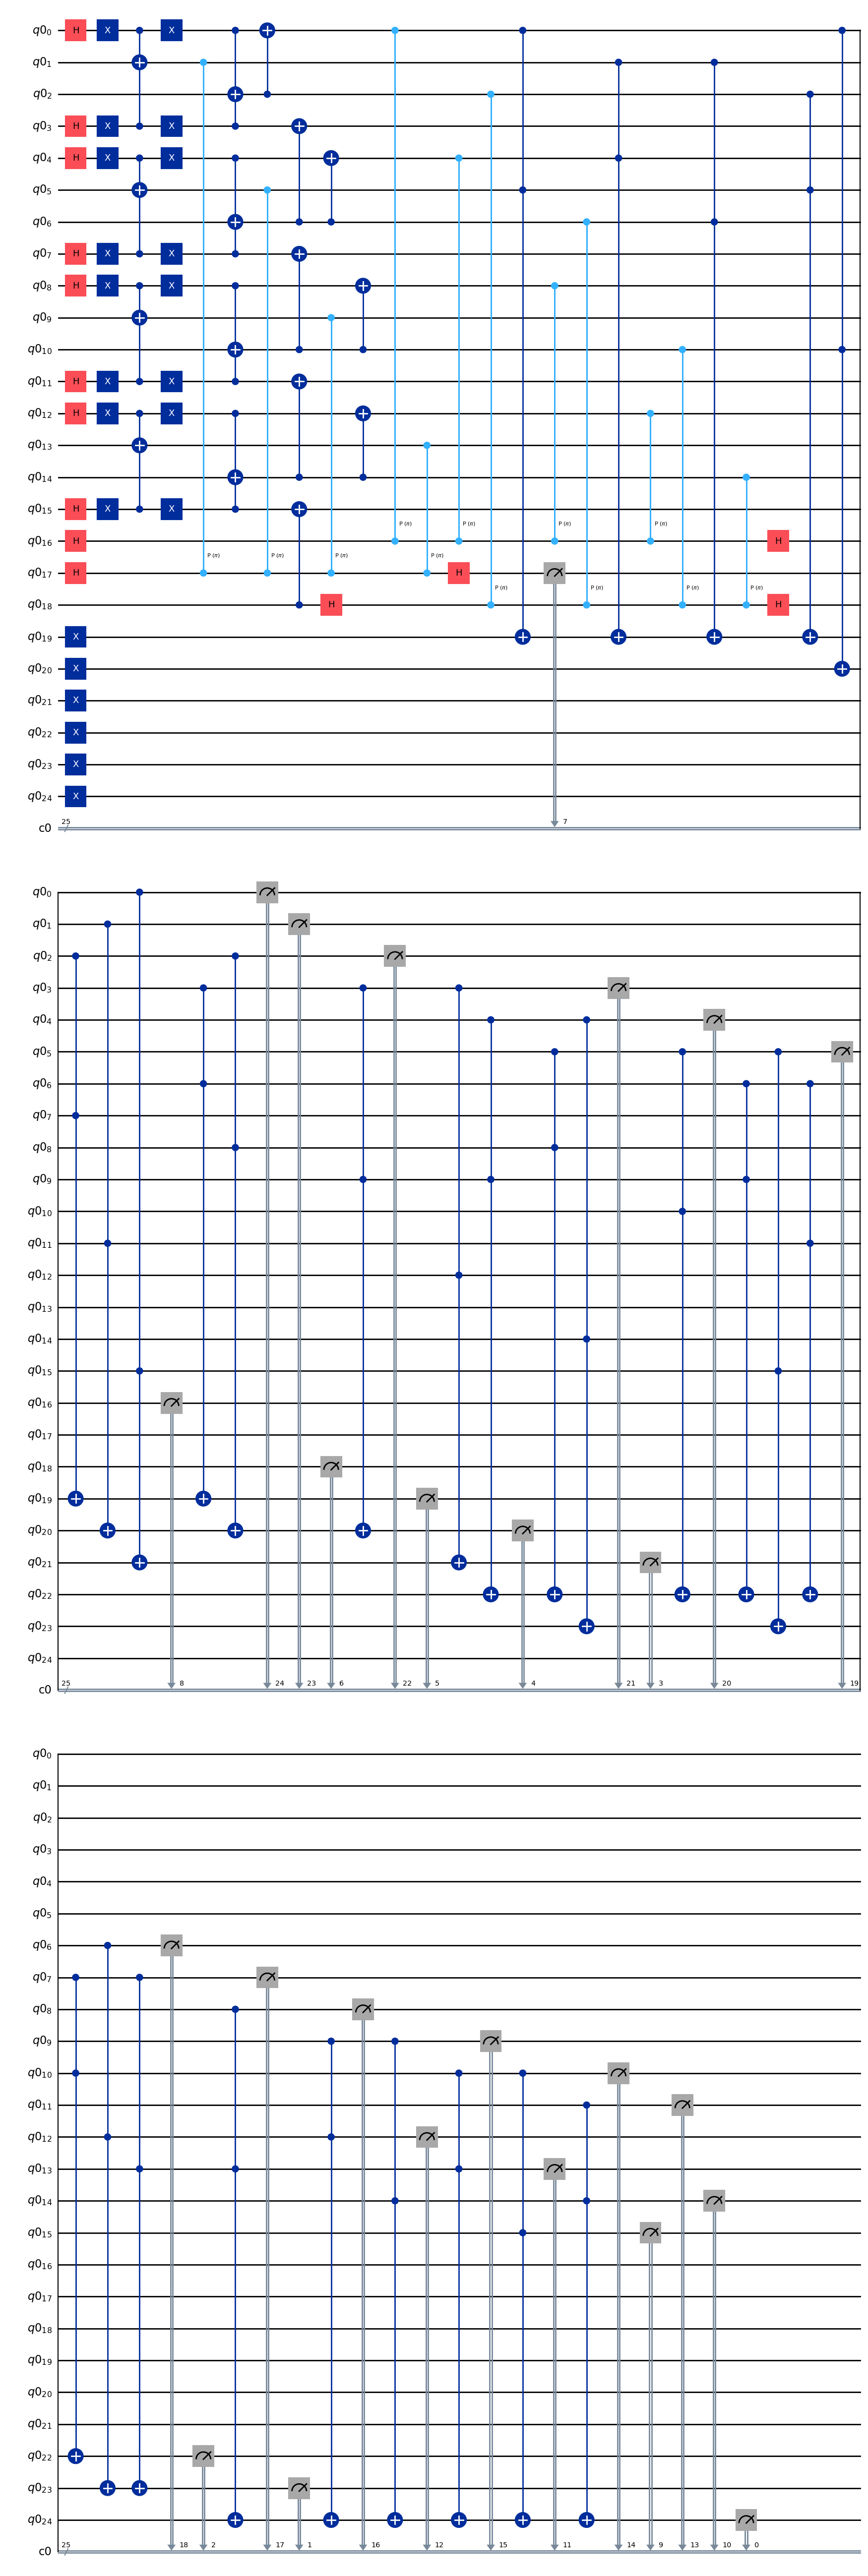

In [9]:
qc.draw(output='mpl')

In [ ]:
simulator = AerSimulator(method='statevector')

qc.save_statevector()
result = simulator.run(qc).result()